# Sequential Testing

Sequential sampling works in a very non-traditional way; instead of a fixed sample size, you choose one item (or a few) at a time, and then test your hypothesis.

In [64]:
import pandas as pd
import numpy as np
import sprt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Adding scripts path
import sys
sys.path.insert(0,'../scripts/')
from data_preProcess import data_preProcess
from data_info import dataframeInfo 
from data_visualization import exploration

In [10]:
df = pd.read_csv('../data/AdSmartABdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [11]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [47]:
# exposed yes count
exposed_yes = df.query('experiment == "exposed"').yes
exposed_count = len(exposed_yes)
exposed_yes_count = exposed_yes.sum(axis=0)
# control yes count
control_yes = df.query('experiment == "control"').yes
control_count = len(control_yes)
control_yes_count = control_yes.sum(axis=0)

In [53]:
df = pd.read_csv("../data/AdSmartABdata.csv")

In [55]:
# copying dataframe
response = df.copy(deep=True)

In [70]:
# getting users who only selects yes or no
response = response[response['yes'] == 1].append(response[response['no'] == 1])

In [69]:
# finding the control group
control_df = response[response['experiment'] == 'control']

In [71]:
# finding the exposed group
exposed_df = response[response['experiment'] == 'exposed']

In [72]:
# removing yes and no columns and replace it with response
# yes = 1 and No = 0
df1 = control_df[control_df['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = control_df[control_df['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
control_plot_df = df1.append(df2).reset_index(drop=True)
control_plot_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
1,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
2,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
3,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1
4,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1


In [73]:
# removing yes and no columns and replace it with response
# yes = 1 and No = 0
df1 = exposed_df[exposed_df['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = exposed_df[exposed_df['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
exposed_plot_df = df1.append(df2).reset_index(drop=True)
exposed_plot_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
1,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
2,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1
3,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1
4,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1


In [74]:
# group by responses and there count for control data
control_yes_data = control_plot_df.groupby(['response']).agg({'response': ['count']})
control_yes_data.columns = ['count']
control_yes_data = control_yes_data.reset_index()
control_yes_data

,response,count
0,0,322
1,1,264


In [75]:
# group by responses and there count for exposed data
exposed_yes_data = exposed_plot_df.groupby(['response']).agg({'response': ['count']})
exposed_yes_data.columns = ['count']
exposed_yes_data = exposed_yes_data.reset_index()
exposed_yes_data

,response,count
0,0,349
1,1,308


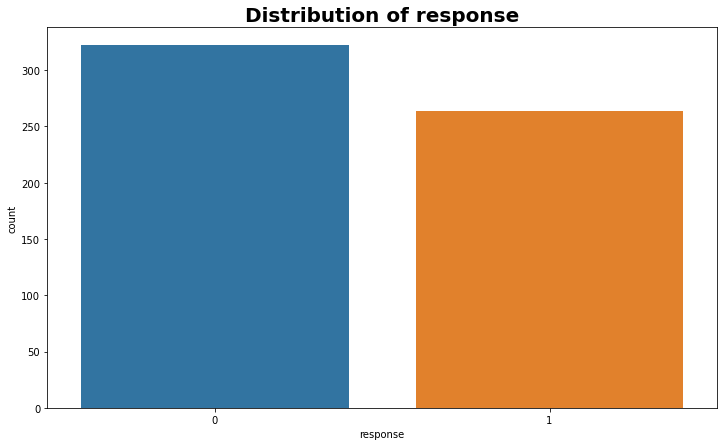

In [76]:
# yes and no response for control group
exploration.plot_count(control_plot_df, 'response')

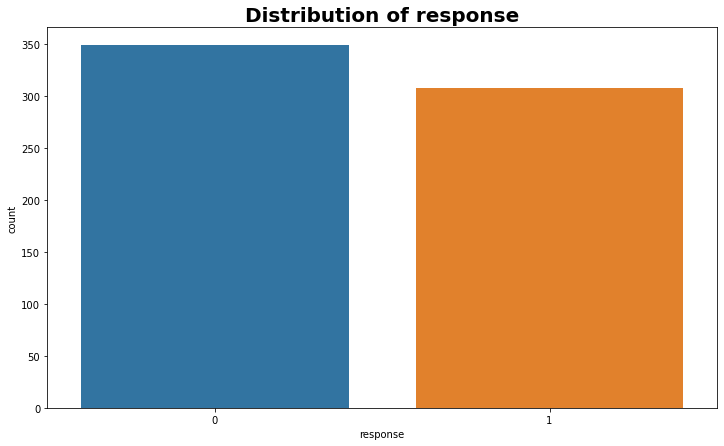

In [77]:
# yes and no response for exposed group
exploration.plot_count(exposed_plot_df, 'response')

In [78]:
# Null value
h0 = control_yes_count/control_count
# Alternative value
h1 = exposed_yes_count/exposed_count
# Type I error
alpha = 0.05
# Type II 
beta = 0.2
# Values
values = np.random.binomial(1, h1, 100)
test = sprt.SPRTBinomial(h0 = h0, h1 = h1, alpha = alpha, beta = beta, values = values)

Decision:	Continue

     values  lower   upper
n                         
91        6 -2.071  21.569
92        6 -2.000  21.639
93        6 -1.929  21.710
94        6 -1.858  21.781
95        6 -1.788  21.852
96        6 -1.717  21.922
97        6 -1.646  21.993
98        6 -1.576  22.064
99        6 -1.505  22.134
100       6 -1.434  22.205


* we have to proceed the test and see if it converges to the blue(Accept Null area)

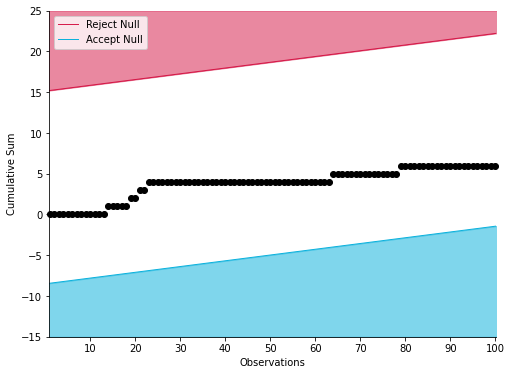

In [79]:
test.plot()